# Outlines 
#### 1. Data cleaning 
#### 2. feature engineering 
#### 3. Getting more insights 
#### 4. Data Pre-processing
      - Splitting  
      - fearure transformation 
#### 5. modeling 
#### 6. evalution 

In [184]:
# Importings
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns
from datasist.structdata import detect_outliers
from category_encoders import OneHotEncoder, BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [96]:
#read data
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [97]:
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


# 1. Data cleaning 


### 1.1 Investegation 

In [98]:
df_train.isna().sum() /len(df_train)

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

### column: `New_price` has 80% nan values 

In [99]:
df_train.drop(columns=['New_Price'], inplace = True)
df_test.drop(columns='New_Price',inplace = True)

#### Notes 
- Numerical values mixed with text in (Mileage, Engine, Power) columns. 
    - in Milage column we have 2 units (kmpl & km/kg)
- Most of New_Price Column is null values (so, we have 2 solution.) 
    - remove it or scrap some data to fill it. 
- Null values values in other columns 
- Seats columns have some values with Zero !! 
- duplicated rows founded 
- Power column have values "null bhp" 

###  1.2 Working with data issues 

> Dropping duplicated columns 

In [100]:
df_train[df_train.duplicated()]
df_train.drop_duplicates()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


> Drop "New_Price" column because most of them is null 


> Why did I choose to remove Null values and not to replace it ? 
- That's simply because this columns need to be fixed and we cannot calculate any value before we fix it. 
- another solution is to make a place holder and replace it after fixing data, (Your desicion id depende on the time) 

In [101]:
print(df_train.shape)
df_train.isna().sum() 

(6019, 12)


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [102]:
df_train[df_train['Engine'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


#### nan values is small and it not a big deal

In [103]:
df_train.dropna(inplace = True)

In [104]:
#

In [105]:
df_train.shape

(5975, 12)

- (KMPL) is refered to Kilometers Per Litre
- (km/kg) is refered to kilometers Per kilogram
> 1 liter  = 1 kilogram 
- Reference : https://en.wikipedia.org/wiki/Litre

In [106]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [107]:
df_train['Mileage(km/kg)']= df_train['Mileage'].str.split(' ',expand = True)[0].astype(float)
df_train.drop(columns='Mileage', inplace = True)

In [108]:
df_train['Engine(cc)']= df_train['Engine'].str.split(' ',expand = True)[0].astype(float)
df_train.drop(columns='Engine', inplace = True)                         

In [109]:
df_train.drop(df_train[df_train['Power'] == 'null bhp'].index,inplace = True)

In [110]:
df_train['Power(bhp)']= df_train['Power'].str.split(' ',expand = True)[0].astype(float)
df_train.drop(columns='Power', inplace = True)   

In [111]:
df_test['Mileage(km/kg)']= df_test['Mileage'].str.split(' ',expand = True)[0].astype(float)
df_test.drop(columns='Mileage', inplace = True)

In [112]:
df_test['Engine(cc)']= df_test['Engine'].str.split(' ',expand = True)[0].astype(float)
df_test.drop(columns='Engine', inplace = True)  

In [113]:
df_test.drop(df_test[df_test['Power'] == 'null bhp'].index,inplace = True)

In [114]:
df_test['Power(bhp)']= df_test['Power'].str.split(' ',expand = True)[0].astype(float)
df_test.drop(columns='Power', inplace = True)   

In [115]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(cc),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80


#### values health checking 

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(cc)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


___________________________________

# 2. Feature Engineering

In [117]:
px.imshow(df_train.corr(),text_auto= True)

#### drop Engine(cc) becouse the correlation between engine and power is very big

- That's to avoid data leakage problem.

In [118]:
df_train.drop(columns ='Engine(cc)', inplace = True)

In [119]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(cc),Power(bhp)
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,4.0,32.26,998.0,58.20
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,5.0,24.70,796.0,47.30
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,7.0,13.68,2393.0,147.80
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,5.0,18.50,1197.0,82.85
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,7.0,16.00,2179.0,140.00


In [120]:
df_test.drop(columns ='Engine(cc)', inplace = True)

In [121]:
# Check Name column uniques 
df_train.select_dtypes('object').nunique()

Name            1811
Location          11
Fuel_Type          4
Transmission       2
Owner_Type         4
dtype: int64

>  "Name" feature has no affect that's because it has so many unique values 
- So let's make it useful and impactful 

In [122]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,140.80


> We can notice that the first word of the name is (Brand), so let's get it 

In [123]:
df_train['Brand']= df_train['Name'].str.split(' ',expand= True)[0]
df_test['Brand']= df_test['Name'].str.split(' ',expand= True)[0]

- A huge difference here, From this columns we can make a big affect. 

> Another observation that first two word can express wich car we want. 
- So, let's change name column with just first 2 words. 

In [124]:
def handle_name(row):
    return " ".join(row.split(" ")[:2])

- That's great, Now we can make an affect with name column. 

In [125]:
df_train['Name']= df_train['Name'].apply(handle_name)
df_test['Name']= df_test['Name'].apply(handle_name)

________________________

# 3. Data understanding 

### 3.1 Univariate analysis 

In [126]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price,Mileage(km/kg),Power(bhp)
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,5.283719,9.603919,18.277839,113.276894
std,3.164568,9.216941e+04,0.805081,11.249453,4.365657,53.881892
min,1998.000000,1.710000e+02,2.000000,0.440000,0.000000,34.200000
25%,2012.000000,3.342250e+04,5.000000,3.517500,15.260000,75.000000
50%,2014.000000,5.260900e+04,5.000000,5.750000,18.200000,97.700000
75%,2016.000000,7.240275e+04,5.000000,10.000000,21.100000,138.100000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,560.000000


In [127]:
px.box(df_train['Power(bhp)'])

# Remove Outliers to check data distribution 

In [128]:
from datasist.structdata import detect_outliers

In [129]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Power(bhp),Brand
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,58.16,Maruti
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,126.20,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,88.70,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,88.76,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,140.80,Audi


In [130]:
df_train.select_dtypes(exclude=['object']).columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage(km/kg)',
       'Power(bhp)'],
      dtype='object')

In [131]:
df_train[['Kilometers_Driven','Mileage(km/kg)','Power(bhp)']].columns

Index(['Kilometers_Driven', 'Mileage(km/kg)', 'Power(bhp)'], dtype='object')

In [132]:
outliers_indices = detect_outliers(df_train, 0, df_train[['Kilometers_Driven','Mileage(km/kg)','Power(bhp)']].columns)
len(outliers_indices)

472

In [133]:
df_train.shape

(5872, 12)

<AxesSubplot:xlabel='Kilometers_Driven'>

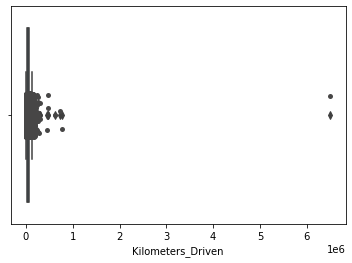

In [134]:
sns.boxplot(x='Kilometers_Driven', data=df_train)
sns.stripplot(x='Kilometers_Driven', data=df_train, color="#474646")

<AxesSubplot:xlabel='Kilometers_Driven'>

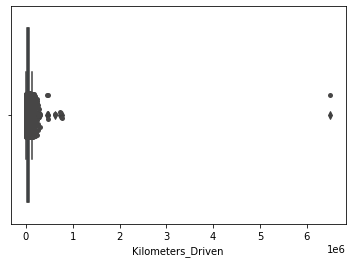

In [135]:
sns.boxplot(x='Kilometers_Driven', data=df_train)
sns.stripplot(x='Kilometers_Driven', data=df_train, color="#474646")

In [136]:
df_train.drop(outliers_indices, inplace=True)

<AxesSubplot:xlabel='Mileage(km/kg)'>

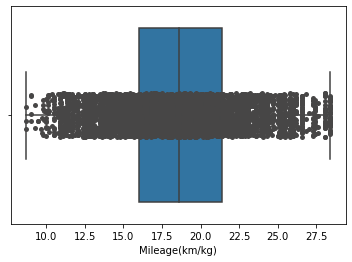

In [137]:
sns.boxplot(x='Mileage(km/kg)', data=df_train)
sns.stripplot(x='Mileage(km/kg)', data=df_train, color="#474646")

### 3.2 Univariate analysis 

- year
- kilometers 
- transmission 
- brand 

## Data summery : 
    - Numerical columns follow the gussian distribution, but have Outliers 
    (My desicion is not to remove it,because it will ne useful)
    - The countrt with the most sales spread is `Mumbai` and the least is `Ahmedabad`
    - Most of cars is form 2010 and 2015

________________________

# 4. Data pre-processing

### 4.1 Data splitting 

In [138]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Power(bhp),Brand
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,58.16,Maruti
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,126.20,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,88.70,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,88.76,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,140.80,Audi


In [139]:

df_train.drop(df_train[df_train['Year']< 2004].index,inplace = True)
df_train.reset_index(drop= True, inplace = True)

In [140]:
df_train['Fuel_Type'].value_counts()
df_train[(df_train['Fuel_Type'] == 'CNG' )| (df_train['Fuel_Type'] == 'LPG' )].index
df_train.drop(df_train[(df_train['Fuel_Type'] == 'CNG' )| (df_train['Fuel_Type'] == 'LPG' )].index,inplace = True)
df_train.reset_index(drop= True, inplace = True)

In [141]:
df_train['Seats'].value_counts()
df_train.drop(df_train[(df_train['Seats'] == 2.0 )| (df_train['Seats'] == 9.0 ) | (df_train['Seats'] == 10.0 )].index,inplace = True)
df_train.reset_index(drop= True, inplace = True)

In [142]:
df_train['Owner_Type'].value_counts()

First             4436
Second             793
Third               74
Fourth & Above       5
Name: Owner_Type, dtype: int64

In [143]:
df_train.drop(df_train[df_train['Owner_Type']== 'Fourth & Above'].index,inplace = True)
df_train.reset_index(drop= True, inplace = True)

In [144]:
df_train.select_dtypes('object').nunique().sum()

219

In [145]:
df_train['Seats'].unique()

array([5., 7., 8., 4., 6.])

In [146]:
y_train = df_train['Price']

In [147]:
X = df_train.drop(columns='Price')

In [148]:
X

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Power(bhp),Brand
0,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,5.0,19.67,126.20,Hyundai
1,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,5.0,18.20,88.70,Honda
2,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,7.0,20.77,88.76,Maruti
3,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,15.20,140.80,Audi
4,Nissan Micra,Jaipur,2013,86999,Diesel,Manual,First,5.0,23.08,63.10,Nissan
...,...,...,...,...,...,...,...,...,...,...,...
5298,Maruti Swift,Delhi,2014,27365,Diesel,Manual,First,5.0,28.40,74.00,Maruti
5299,Hyundai Xcent,Jaipur,2015,100000,Diesel,Manual,First,5.0,24.40,71.00,Hyundai
5300,Mahindra Xylo,Jaipur,2012,55000,Diesel,Manual,Second,8.0,14.00,112.00,Mahindra
5301,Maruti Wagon,Kolkata,2013,46000,Petrol,Manual,First,5.0,18.90,67.10,Maruti


In [149]:

X_test= df_test

In [150]:
df_train.select_dtypes('object').nunique()

Name            175
Location         11
Fuel_Type         2
Transmission      2
Owner_Type        3
Brand            26
dtype: int64

> Why I have started with splliting data  ?
- That's to avoid data leakage problem. 

### 4.2 Data transformation 

#### 4.2.1 Numerical transformation 

#### 4.2.1 Catogerical transformation

##### 4.2.1.1 ordinal transformation

> The best case of owner type is (First), Of course the worst is Fourth & Above

In [151]:
X['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [152]:
Owner_Type_ordinal = {'First': 3,'Second': 2, 'Third': 1}
X['Owner_Type']= X['Owner_Type'].map(Owner_Type_ordinal)

In [153]:
X['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [154]:
Transmission_ordinal = {'Automatic': 2, 'Manual': 1}
X['Transmission']= X['Transmission'].map(Transmission_ordinal)

In [155]:
X['Fuel_Type'].value_counts()

Diesel    2770
Petrol    2533
Name: Fuel_Type, dtype: int64

In [156]:
fuel_type = {'Diesel': 2, 'Petrol': 1}
X['Fuel_Type']= X['Fuel_Type'].map(fuel_type)

## test

In [157]:
Owner_Type_ordinal = {'First': 4,'Second': 3, 'Third': 2, 'Fourth & Above': 1}
df_test['Owner_Type']= df_test['Owner_Type'].map(Owner_Type_ordinal)

In [158]:
Transmission_ordinal = {'Automatic': 2, 'Manual': 1}
df_test['Transmission']= df_test['Transmission'].map(Transmission_ordinal)

##### 4.2.1.2 Nominal transformation


In [159]:
X.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Power(bhp),Brand
0,Hyundai Creta,Pune,2015,41000,2,1,3,5.0,19.67,126.20,Hyundai
1,Honda Jazz,Chennai,2011,46000,1,1,3,5.0,18.20,88.70,Honda
2,Maruti Ertiga,Chennai,2012,87000,2,1,3,7.0,20.77,88.76,Maruti
3,Audi A4,Coimbatore,2013,40670,2,2,2,5.0,15.20,140.80,Audi
4,Nissan Micra,Jaipur,2013,86999,2,1,3,5.0,23.08,63.10,Nissan


In [160]:
df_train.select_dtypes('object').nunique()

Name            175
Location         11
Fuel_Type         2
Transmission      2
Owner_Type        3
Brand            26
dtype: int64

In [161]:
ohe = BinaryEncoder()
ohe.fit(X[['Name','Location','Brand']])
XT_train = ohe.transform(X[['Name','Location','Brand']])
print(XT_train.shape)
XT_train.head()

(5303, 17)


,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1


In [162]:
ohe = BinaryEncoder()
ohe.fit(df_test[['Name','Location','Brand','Fuel_Type']])
X_test = ohe.transform(df_test[['Name','Location','Brand','Fuel_Type']])
print(X_test.shape)
X_test.head()

(1212, 20)


,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Fuel_Type_0,Fuel_Type_1,Fuel_Type_2
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0
5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1


In [163]:
X.drop(columns=['Name','Location','Brand'],inplace = True)

In [164]:
df_test.drop(columns=['Name','Location','Brand'],inplace = True)

In [165]:
X_train= pd.concat([X,XT_train],axis = 1)

In [166]:
X_test= pd.concat([df_test,X_test],axis = 1)

In [170]:
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'Mileage(km/kg)', 'Power(bhp)', 'Name_0', 'Name_1', 'Name_2',
       'Name_3', 'Name_4', 'Name_5', 'Name_6', 'Name_7', 'Location_0',
       'Location_1', 'Location_2', 'Location_3', 'Brand_0', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4'],
      dtype='object')

In [67]:
X_test.dropna(inplace= True)

# 5.0 Modeling 

### 5.1 Linear regression (OLS method)

In [68]:
model = LinearRegression()

In [69]:
model.fit(X_train,y_train)

LinearRegression()

In [70]:
model_predect= model.predict(X_test)

In [71]:
model.coef_

array([ 6.80967286e-01, -3.66345486e-05,  2.23177122e+00,  1.17946468e-01,
       -4.50025914e-01, -1.80360197e-01,  9.97359800e-02, -1.35197747e+00,
        7.80992822e-02, -4.02391550e-01, -5.58638570e-01,  1.87780598e-01,
        6.99465168e-01,  4.21413199e-01, -4.12002137e-01, -1.93303315e-01,
        1.12848548e+00,  2.38702255e-01, -2.94453795e-01,  9.34672833e-01,
        1.53205659e-01,  1.78649874e+00, -2.87853090e+00, -1.19932590e+00,
       -1.29887434e+00, -1.70632275e+00, -2.57394775e+00])

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [188]:
X_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Power(bhp),Name_0,Name_1,...,Name_7,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
4498,2016,50000,2,2,3,5.0,17.90,201.15,0,1,...,1,1,0,1,0,0,1,1,0,0
1672,2018,15982,1,1,3,5.0,20.73,91.10,0,0,...,1,0,1,1,0,0,0,0,1,1
330,2014,41380,1,2,2,5.0,14.80,120.70,0,0,...,0,0,1,1,0,0,1,1,0,0
3555,2015,35314,2,1,3,5.0,23.20,73.94,0,0,...,1,0,1,1,0,0,0,0,1,1
3036,2016,82497,2,1,3,5.0,23.65,88.50,0,1,...,0,1,0,1,0,0,0,0,1,1


In [199]:
scaler_train = MinMaxScaler()
scaler_train.fit(X_train)
X_train_scaled = scaler_train.transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [207]:
scaler_test = MinMaxScaler()
scaler_train.fit(X_test)
X_test_scaled = scaler_train.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [219]:
y_train

4498    49.00
1672     9.96
330     11.77
3555     4.27
3036     8.99
        ...  
3092     5.55
3772    13.00
5191     7.75
5226     2.80
860     17.50
Name: Price, Length: 3712, dtype: float64

In [220]:
y_train.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [218]:
scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[49.    9.96 11.77 ...  7.75  2.8  17.5 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [217]:
X_test_scaled.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Power(bhp),Name_0,Name_1,...,Name_7,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,...,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,0.645422,0.403155,0.524199,0.261471,0.912319,0.319610,0.505403,0.372624,0.040226,0.185418,...,0.526084,0.304840,0.419862,0.547454,0.535512,0.075424,0.268385,0.377121,0.613451,0.649906
std,0.195944,0.203691,0.499571,0.439574,0.210597,0.193004,0.201424,0.213398,0.196551,0.388758,...,0.499476,0.460484,0.493691,0.497899,0.498894,0.264158,0.443258,0.484818,0.487112,0.477149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.533333,0.255814,0.000000,0.000000,1.000000,0.250000,0.370558,0.206861,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.391473,1.000000,0.000000,1.000000,0.250000,0.502538,0.283784,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.800000,0.532446,1.000000,1.000000,1.000000,0.250000,0.644162,0.478170,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
X_train_scaled.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Power(bhp),Name_0,Name_1,...,Name_7,Location_0,Location_1,Location_2,Location_3,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
count,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,...,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000
mean,0.645672,0.404049,0.521552,0.270744,0.910830,0.314049,0.503580,0.370191,0.045259,0.184537,...,0.543373,0.313847,0.406519,0.547953,0.521821,0.074353,0.243804,0.359644,0.627425,0.623922
std,0.197632,0.206086,0.499603,0.444404,0.207632,0.180727,0.202025,0.205360,0.207899,0.387973,...,0.498182,0.464118,0.491250,0.497762,0.499591,0.262381,0.429434,0.479961,0.483556,0.484465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.533333,0.247789,0.000000,0.000000,1.000000,0.250000,0.370558,0.217369,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.393304,1.000000,0.000000,1.000000,0.250000,0.502538,0.288979,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.800000,0.534601,1.000000,1.000000,1.000000,0.250000,0.644670,0.486541,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
scaler_train.data_min_

array([2.004e+03, 1.710e+02, 1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
       8.700e+00, 3.420e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00])

In [173]:
model_3 = LinearRegression()

In [209]:
model_4 = LinearRegression()

In [210]:
y_train.shape

(3712,)

In [211]:
X_train.shape

(3712, 25)

In [212]:
model_4.fit(X_train,y_train)

LinearRegression()

In [213]:
model_predect_w= model_4.predict(X_test)

In [214]:
mean_absolute_error(y_test,model_predect_w)

2.8385920668873394

In [215]:
model_4.score(X_train,y_train)

0.7388842814199933

In [216]:
model_4.score(X_test,y_test)

0.7157037393580612